In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_ball = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")
df_matches = pd.read_csv("IPL Matches 2008-2020.csv")

In [4]:
df_matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [6]:
df_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

# 1.What was the count of matches played in each season? 

In [7]:
df_matches['date'] = pd.to_datetime(df_matches['date']) # Converted into date time for better use 
df_matches['season'] = df_matches['date'].dt.year
match_per_seasons = df_matches['season'].value_counts().sort_index()
match_per_seasons

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
Name: count, dtype: int64

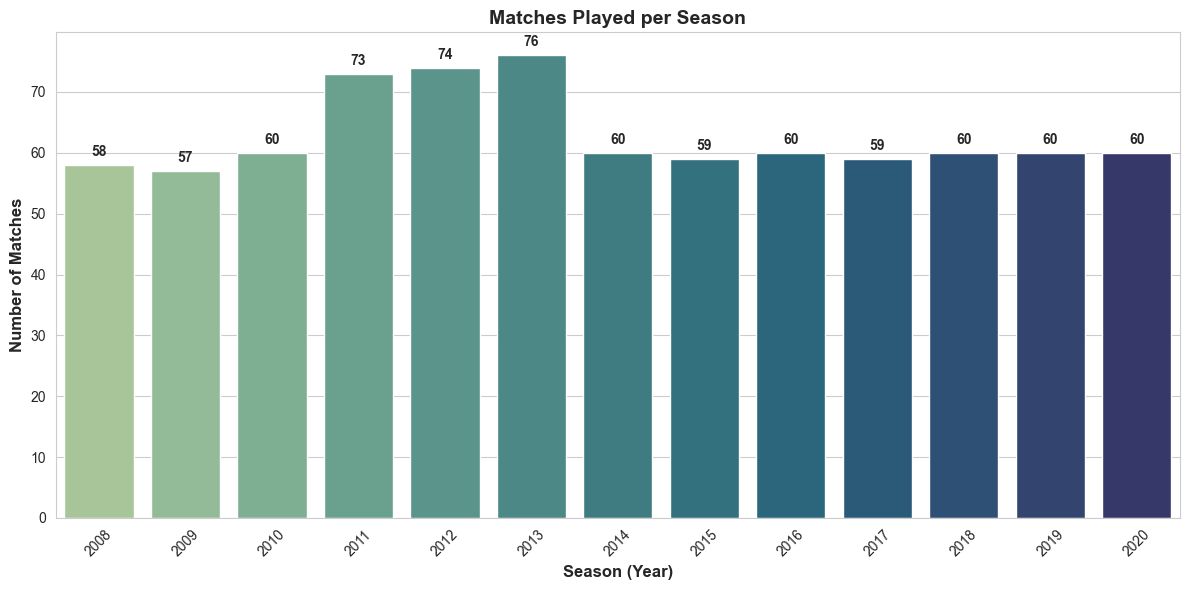

In [8]:
# Convert Series to DataFrame for Seaborn
df_season_matches = match_per_seasons.reset_index()
df_season_matches.columns = ['season', 'matches']

# Set style
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

# Plot with hue=x and no legend
sns.barplot(
    data=df_season_matches, 
    x="season", 
    y="matches", 
    hue="season", 
    palette="crest", 
    dodge=False, 
    legend=False
)

# Add labels on bars
for i, v in enumerate(df_season_matches['matches']):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels and title
plt.xlabel("Season (Year)", fontsize=12, fontweight="bold")
plt.ylabel("Number of Matches", fontsize=12, fontweight="bold")
plt.title("Matches Played per Season", fontsize=14, fontweight="bold")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2.How many runs were scored in each season? 

In [9]:
merged_data = df_matches.merge(df_ball[['total_runs','id']], on = 'id')
runs_each_season = merged_data.groupby('season')['total_runs'].sum().reset_index()
runs_each_season

,season,total_runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21154
4,2012,22453
5,2013,22541
6,2014,18909
7,2015,18332
8,2016,18862
9,2017,18769


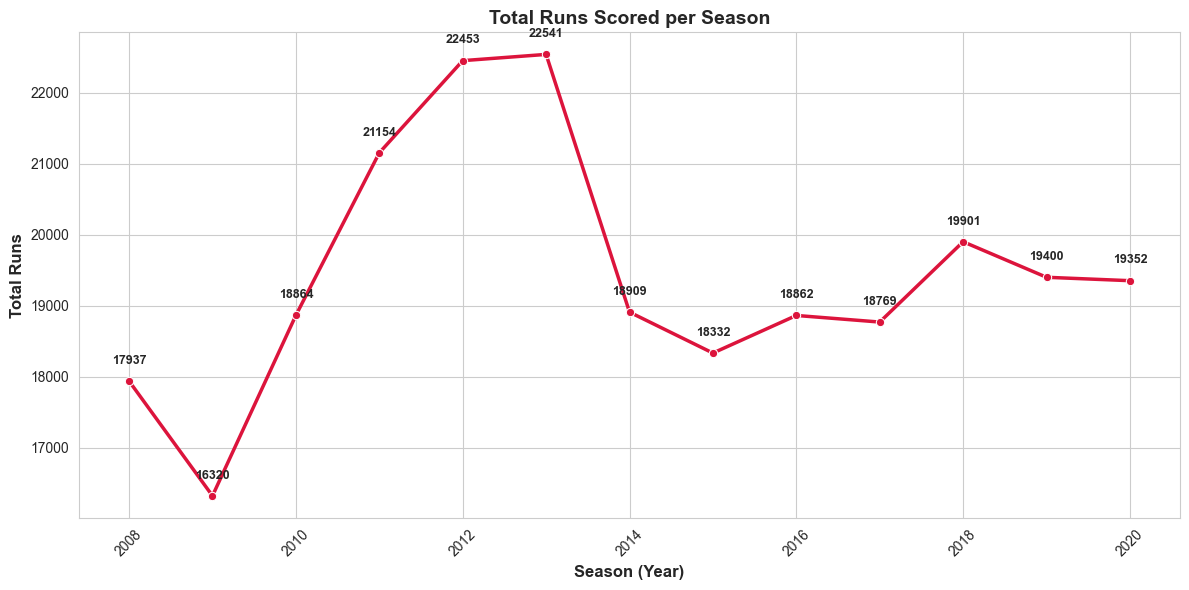

In [10]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

sns.lineplot(
    data=runs_each_season,
    x="season",
    y="total_runs",
    marker="o",
    linewidth=2.5,
    color="crimson"
)

for i, row in runs_each_season.iterrows():
    plt.text(row["season"], row["total_runs"]+200, str(row["total_runs"]),
             ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.xlabel("Season (Year)", fontsize=12, fontweight="bold")
plt.ylabel("Total Runs", fontsize=12, fontweight="bold")
plt.title("Total Runs Scored per Season", fontsize=14, fontweight="bold")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3.	What were the runs scored per match in different seasons? 

In [11]:
runs_per_match_diff_season = merged_data.groupby(['season','id'])['total_runs'].sum().reset_index()
runs_per_match_diff_season

,season,id,total_runs
0,2008,335982,304
1,2008,335983,447
2,2008,335984,261
3,2008,335985,331
4,2008,335986,222
...,...,...,...
811,2020,1216547,402
812,2020,1237177,343
813,2020,1237178,263
814,2020,1237180,361


# 4.Who has umpired the most? 

In [12]:
Umpires = pd.concat([df_matches['umpire1'],df_matches['umpire2']])
most_umpiring = Umpires.value_counts().reset_index()
most_umpiring.columns = ['Name' , 'Match']

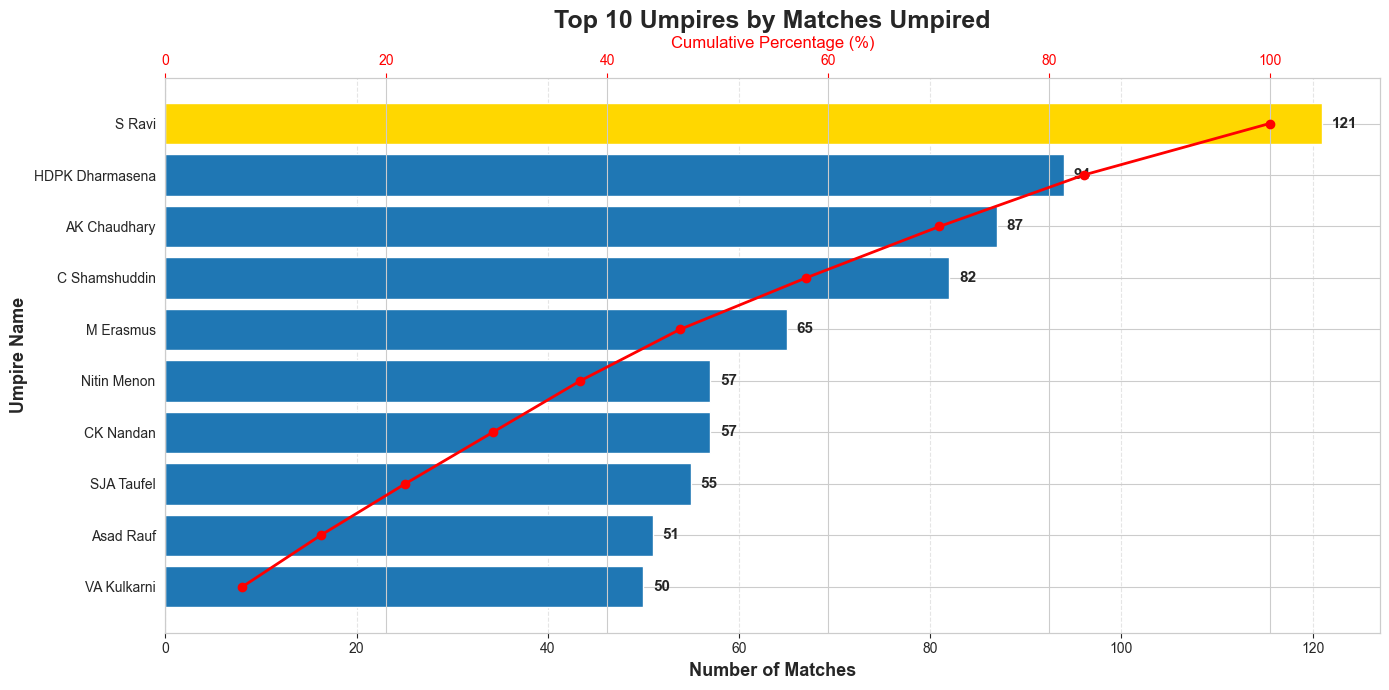

In [13]:
top_umpires = most_umpiring.head(10).copy()
top_umpires = top_umpires.sort_values('Match', ascending=True)  

top_umpires['cum_pct'] = top_umpires['Match'].cumsum() / top_umpires['Match'].sum() * 100

fig, ax1 = plt.subplots(figsize=(14,7))

bar_colors = ['gold' if i == top_umpires['Match'].idxmax() else '#1f77b4' for i in top_umpires.index]

for i, row in enumerate(top_umpires.itertuples()):
    ax1.barh(i, row.Match, color=bar_colors[i])
    ax1.text(row.Match + 1, i, str(row.Match), va='center', fontsize=11, fontweight='bold')

ax1.set_yticks(range(len(top_umpires)))
ax1.set_yticklabels(top_umpires['Name'])
ax1.set_xlabel('Number of Matches', fontsize=13, fontweight='bold')
ax1.set_ylabel('Umpire Name', fontsize=13, fontweight='bold')
ax1.set_title('Top 10 Umpires by Matches Umpired', fontsize=18, fontweight='bold')
ax1.grid(axis='x', linestyle='--', alpha=0.5)

ax2 = ax1.twiny()
ax2.plot(top_umpires['cum_pct'], range(len(top_umpires)), color='red', marker='o', linewidth=2)
ax2.set_xlabel('Cumulative Percentage (%)', fontsize=12, color='red')
ax2.set_xlim(0, 110)
ax2.tick_params(axis='x', colors='red')

plt.tight_layout()
plt.show()




# 5.Which team has won the most tosses?

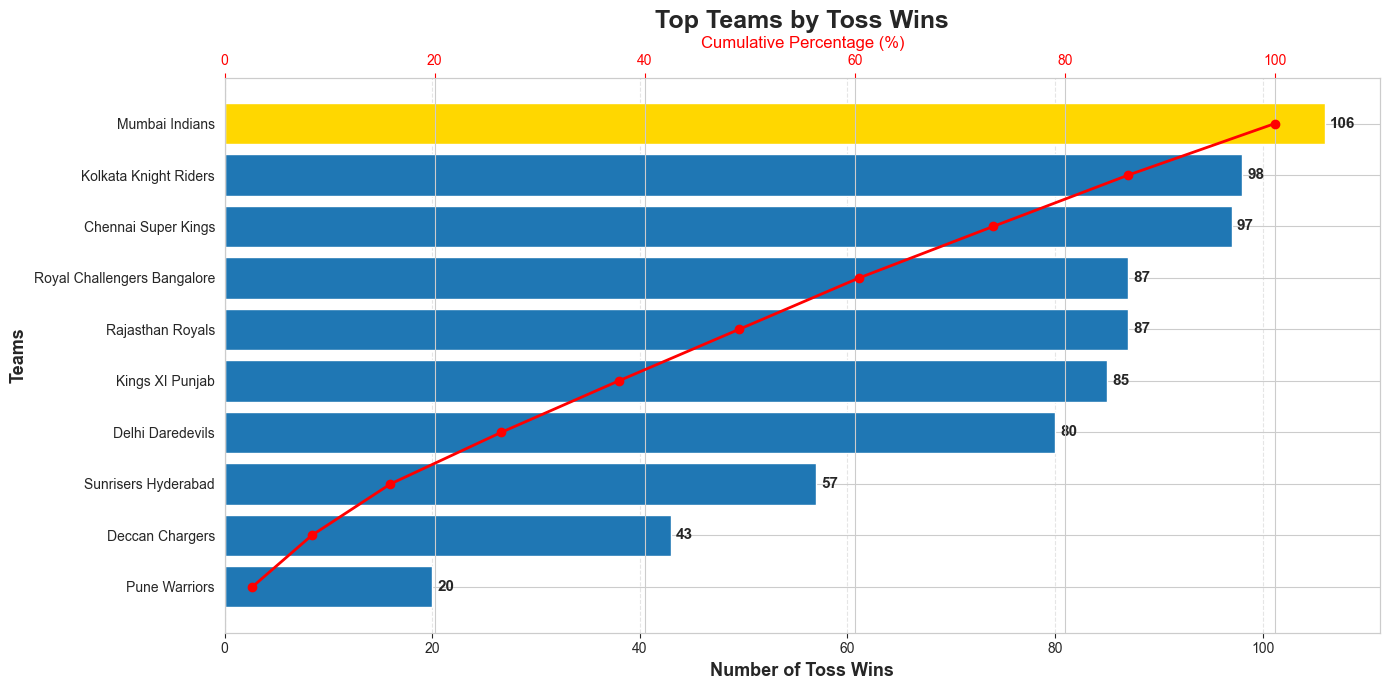

In [14]:
# Compute toss wins
most_toss_win = df_matches['toss_winner'].value_counts().reset_index()
most_toss_win.columns = ['Teams', 'Toss Wins']

# Top 10 teams
top_teams = most_toss_win.head(10).sort_values('Toss Wins', ascending=True)

# Compute cumulative percentage
top_teams['cum_pct'] = top_teams['Toss Wins'].cumsum() / top_teams['Toss Wins'].sum() * 100

fig, ax1 = plt.subplots(figsize=(14,7))

# Bar colors: gold for the top team
bar_colors = ['gold' if i == top_teams['Toss Wins'].idxmax() else '#1f77b4' for i in top_teams.index]

# Plot horizontal bars with annotations
for i, row in enumerate(top_teams.itertuples()):
    ax1.barh(i, row._2, color=bar_colors[i])
    ax1.text(row._2 + 0.5, i, str(row._2), va='center', fontsize=11, fontweight='bold')

# Y-axis labels
ax1.set_yticks(range(len(top_teams)))
ax1.set_yticklabels(top_teams['Teams'])
ax1.set_xlabel('Number of Toss Wins', fontsize=13, fontweight='bold')
ax1.set_ylabel('Teams', fontsize=13, fontweight='bold')
ax1.set_title('Top Teams by Toss Wins', fontsize=18, fontweight='bold')
ax1.grid(axis='x', linestyle='--', alpha=0.5)

# Secondary axis: cumulative percentage
ax2 = ax1.twiny()
ax2.plot(top_teams['cum_pct'], range(len(top_teams)), color='red', marker='o', linewidth=2)
ax2.set_xlabel('Cumulative Percentage (%)', fontsize=12, color='red')
ax2.set_xlim(0, 110)
ax2.tick_params(axis='x', colors='red')

plt.tight_layout()
plt.show()


# 6.What does the team decide after winning the toss? 

In [15]:
win_toss_chose = pd.crosstab(df_matches['toss_winner'],df_matches['toss_decision'])



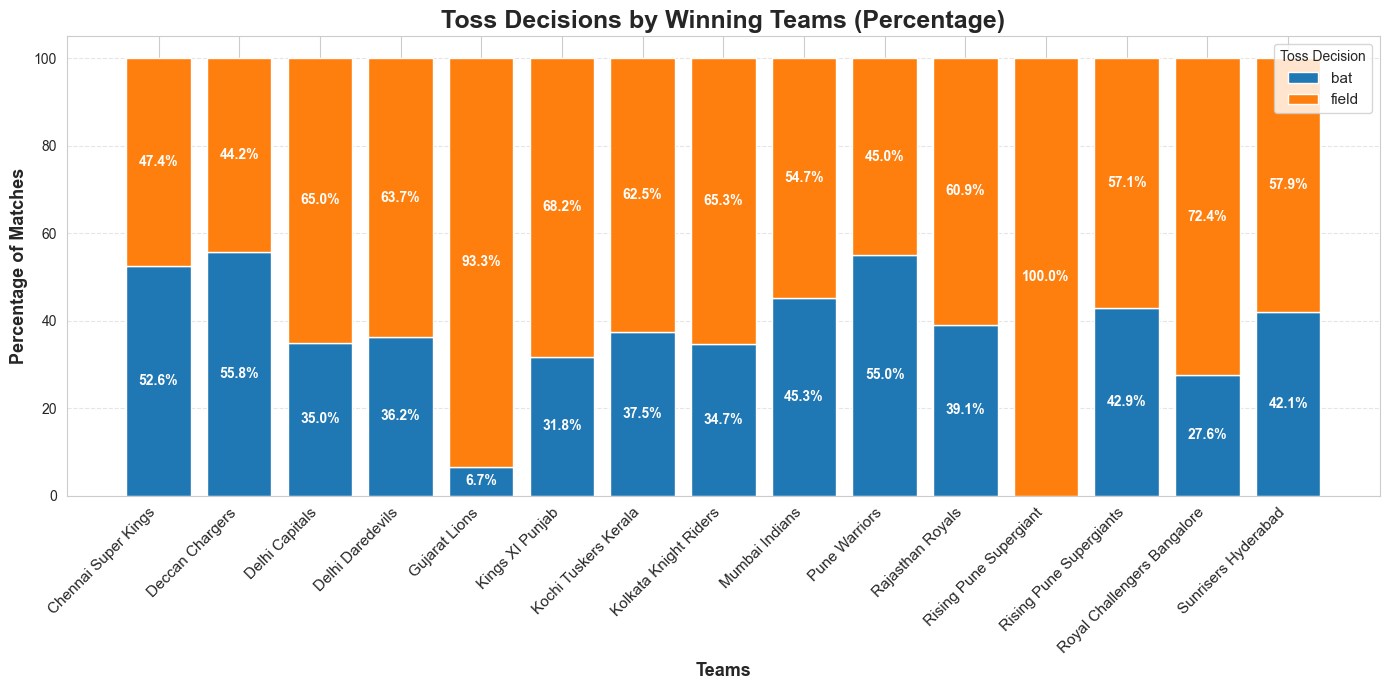

In [16]:
# Compute percentage per team
win_toss_chose = pd.crosstab(df_matches['toss_winner'],df_matches['toss_decision'])
win_toss_chose_pct = win_toss_chose.div(win_toss_chose.sum(axis=1), axis=0) * 100

teams = win_toss_chose_pct.index
bat_perc = win_toss_chose_pct['bat'].values
field_perc = win_toss_chose_pct['field'].values

# Plot
fig, ax = plt.subplots(figsize=(14,7))

# Bottom array for stacking
bottoms = np.zeros(len(teams))

# Colors
colors = ['#1f77b4', '#ff7f0e']  # bat=blue, field=orange

# Plot stacked bars
for i, col in enumerate(['bat','field']):
    vals = win_toss_chose_pct[col].values
    ax.bar(np.arange(len(teams)), vals, bottom=bottoms, color=colors[i], label=col)
    # Annotate percentages
    for j, val in enumerate(vals):
        if val > 0:
            ax.text(j, bottoms[j] + val/2, f'{val:.1f}%', ha='center', va='center', color='white', fontweight='bold', fontsize=10)
    bottoms += vals

# Labels and aesthetics
ax.set_xticks(np.arange(len(teams)))
ax.set_xticklabels(teams, rotation=45, ha='right', fontsize=11)
ax.set_ylabel('Percentage of Matches', fontsize=13, fontweight='bold')
ax.set_xlabel('Teams', fontsize=13, fontweight='bold')
ax.set_title('Toss Decisions by Winning Teams (Percentage)', fontsize=18, fontweight='bold')
ax.legend(title='Toss Decision', fontsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



# 7.How does the toss decision vary across seasons? 


In [17]:
toss_decision = df_matches.groupby('season')['toss_decision'].value_counts().unstack()
toss_decision['Total'] = toss_decision.sum(axis=1)

toss_decision['Bat%'] = (toss_decision['bat']/toss_decision['Total'] * 100).round(1)
toss_decision['field%'] = (toss_decision['field']/toss_decision['Total'] * 100).round(1)


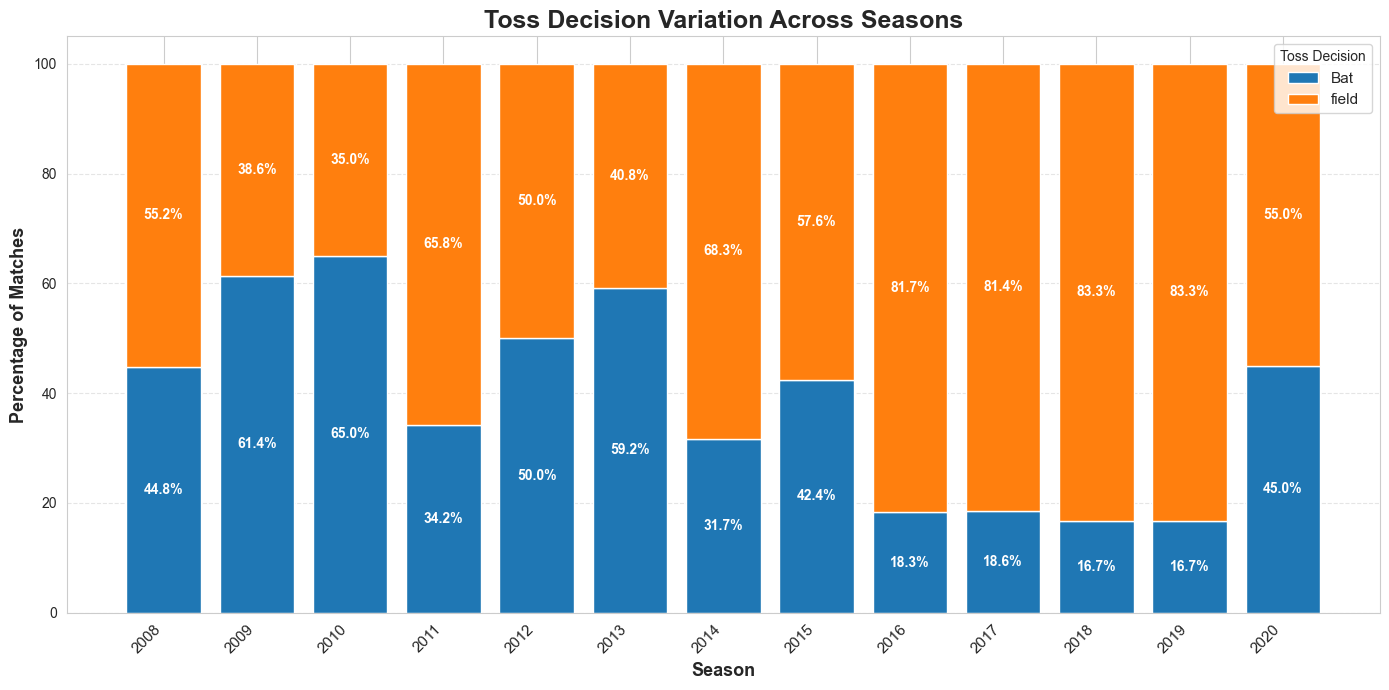

In [18]:
# Prepare data
seasons = toss_decision.index
bat_pct = toss_decision['Bat%'].values
field_pct = toss_decision['field%'].values

fig, ax = plt.subplots(figsize=(14,7))

# Bottom array for stacking
bottoms = np.zeros(len(seasons))

# Colors: Bat = blue, Field = orange
colors = ['#1f77b4', '#ff7f0e']

# Plot stacked bars and annotate percentages
for i, col in enumerate(['Bat%', 'field%']):
    vals = toss_decision[col].values
    ax.bar(np.arange(len(seasons)), vals, bottom=bottoms, color=colors[i], label=col.replace('%',''))
    for j, val in enumerate(vals):
        if val > 0:
            ax.text(j, bottoms[j]+val/2, f'{val:.1f}%', ha='center', va='center', color='white', fontweight='bold', fontsize=10)
    bottoms += vals

# X-axis labels
ax.set_xticks(np.arange(len(seasons)))
ax.set_xticklabels(seasons, rotation=45, ha='right', fontsize=11)

# Labels and title
ax.set_xlabel('Season', fontsize=13, fontweight='bold')
ax.set_ylabel('Percentage of Matches', fontsize=13, fontweight='bold')
ax.set_title('Toss Decision Variation Across Seasons', fontsize=18, fontweight='bold')

# Legend and grid
ax.legend(title='Toss Decision', fontsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# 8.Does winning the toss imply winning the game?

In [19]:
toss_win_match =  df_matches['toss_winner'] == df_matches['winner']
hit_rate = toss_win_match.mean() * 100 
print(f"Overall: The toss winner also won the match in {hit_rate:.2f}% of matches.")

Overall: The toss winner also won the match in 51.23% of matches.


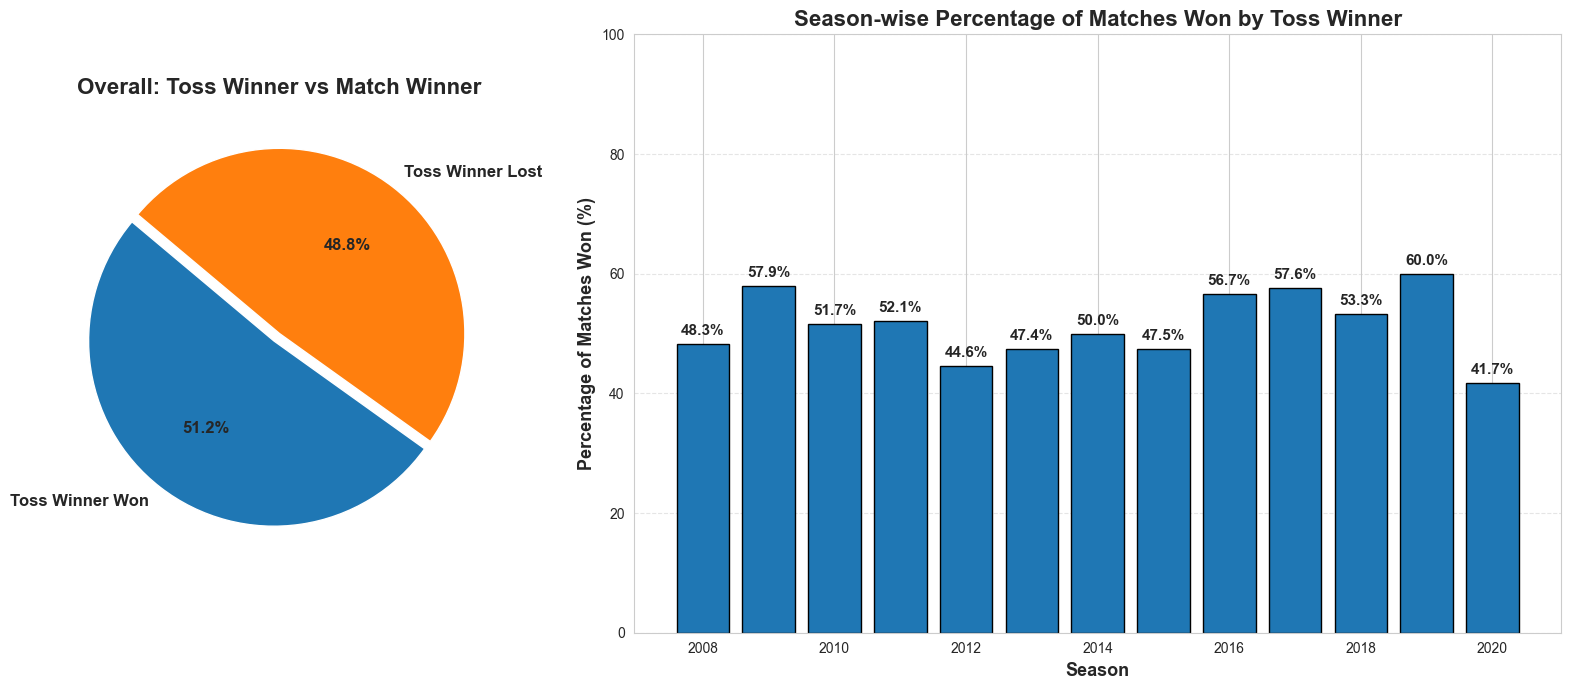

In [20]:
toss_win_match = df_matches['toss_winner'] == df_matches['winner']
overall_counts = toss_win_match.value_counts()
overall_labels = ['Toss Winner Won', 'Toss Winner Lost']
overall_colors = ['#1f77b4', '#ff7f0e']

# Season-wise toss-win percentage
season_toss_win = (df_matches['toss_winner'] == df_matches['winner']).groupby(df_matches['season']).mean() * 100

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7), gridspec_kw={'width_ratios':[1,2]})

# --- Left: Overall pie chart ---
ax1.pie(overall_counts, labels=overall_labels, autopct='%1.1f%%', startangle=140,
        colors=overall_colors, explode=(0.05,0), textprops={'fontsize':12, 'fontweight':'bold'})
ax1.set_title('Overall: Toss Winner vs Match Winner', fontsize=16, fontweight='bold')

# --- Right: Season-wise bar chart ---
bars = ax2.bar(season_toss_win.index, season_toss_win.values, color='#1f77b4', edgecolor='black')
ax2.set_xlabel('Season', fontsize=13, fontweight='bold')
ax2.set_ylabel('Percentage of Matches Won (%)', fontsize=13, fontweight='bold')
ax2.set_title('Season-wise Percentage of Matches Won by Toss Winner', fontsize=16, fontweight='bold')
ax2.set_ylim(0,100)
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bar values
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height+1, f'{height:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


# 9 How many times has the chasing team won the match?

In [21]:
Chasing_team_won = df_matches.groupby('season')['result'].apply(lambda x : (x == 'wickets').sum()).reset_index()
Chasing_team_won.columns = ['Seasons', 'Chasing Team Won']
Chasing_team_won


,Seasons,Chasing Team Won
0,2008,34
1,2009,29
2,2010,28
3,2011,39
4,2012,40
5,2013,37
6,2014,37
7,2015,24
8,2016,39
9,2017,32


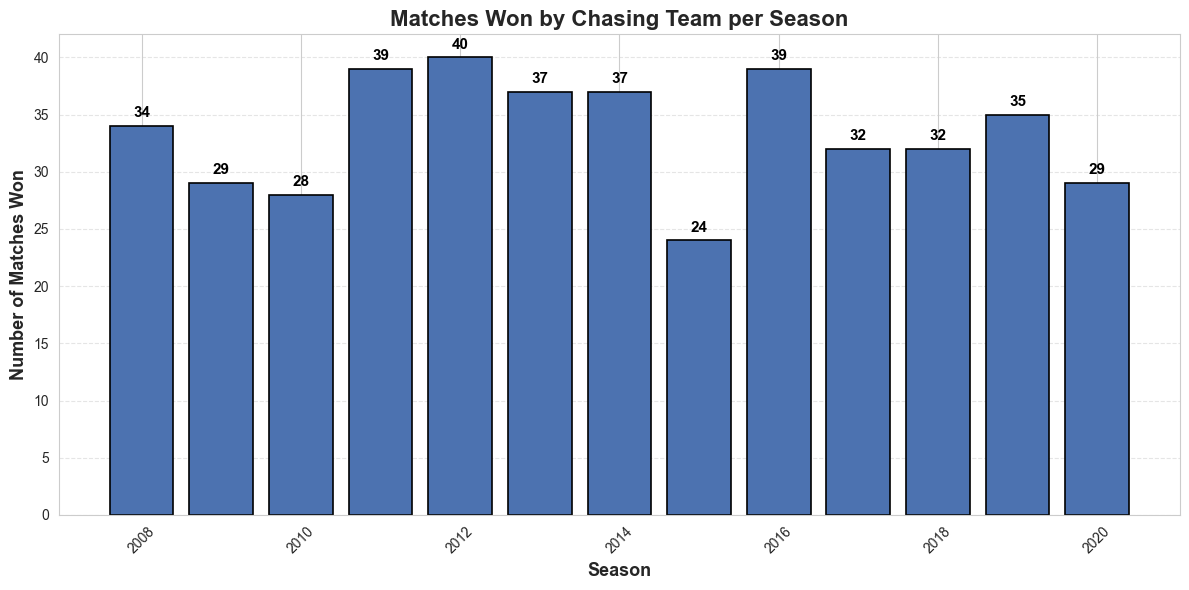

In [22]:
plt.figure(figsize=(12,6))

# Bars
bars = plt.bar(Chasing_team_won['Seasons'], Chasing_team_won['Chasing Team Won'], 
               color='#4c72b0', edgecolor='black', linewidth=1.2)

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)), 
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

# Labels and title
plt.xlabel('Season', fontsize=13, fontweight='bold')
plt.ylabel('Number of Matches Won', fontsize=13, fontweight='bold')
plt.title('Matches Won by Chasing Team per Season', fontsize=16, fontweight='bold')

# X-axis rotation for readability
plt.xticks(rotation=45)

# Gridlines for comparison
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Tight layout
plt.tight_layout()

plt.show()


# 10.	Which all teams had won this tournament? 

In [23]:
ipl_winers = df_matches.groupby('season')['winner'].last().reset_index()
ipl_winers.columns = ['Season' , "Winners"]
ipl_winers

,Season,Winners
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


# 11.	Which team has played the most number of matches? 

In [24]:
concat_matches = pd.concat([df_matches['team1'],df_matches['team2']]).value_counts()
team_most_played = concat_matches.idxmax()
print(f"The team that played the most matches is: {team_most_played}")

The team that played the most matches is: Mumbai Indians


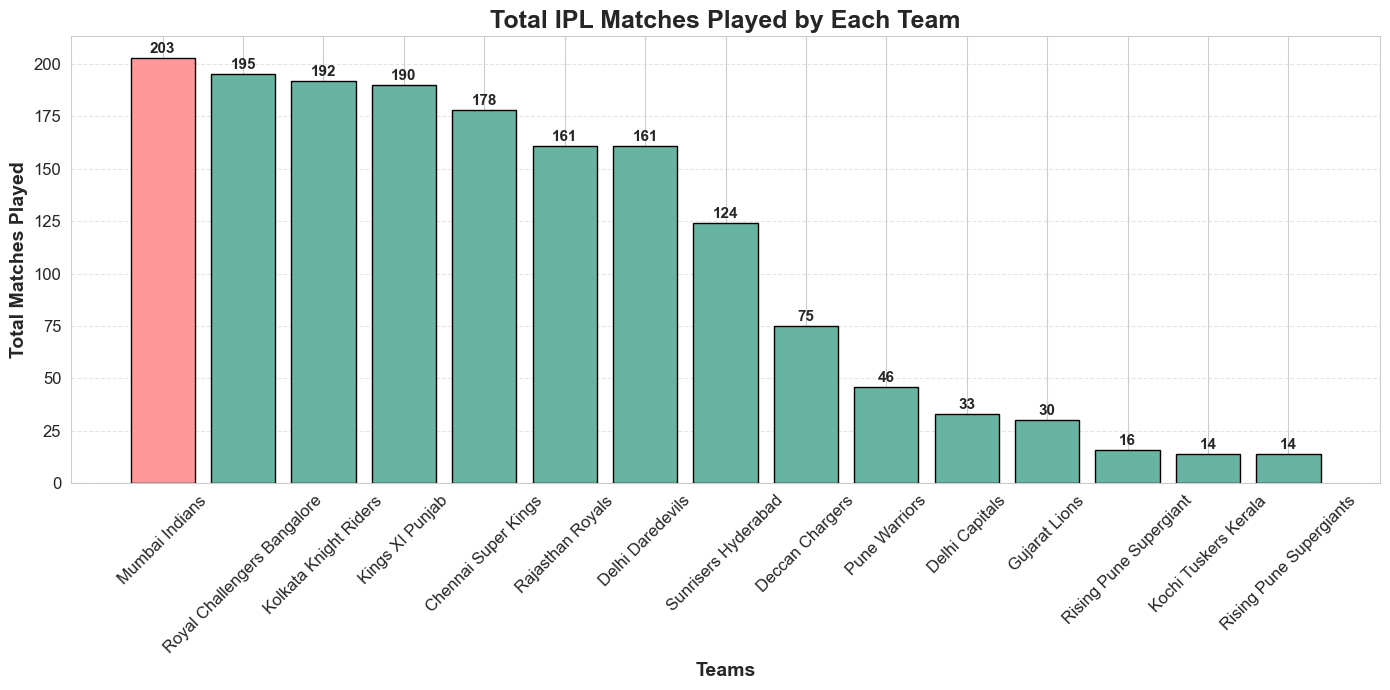

In [25]:
# Identify the team that played the most matches
top_team = concat_matches.idxmax()

# Colors: highlight top team
colors = ['#ff9999' if team == top_team else '#69b3a2' for team in concat_matches.index]

plt.figure(figsize=(14,7))

# Bar plot
bars = plt.bar(concat_matches.index, concat_matches.values, color=colors, edgecolor='black')

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(int(height)),
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Labels and title
plt.xlabel('Teams', fontsize=14, fontweight='bold')
plt.ylabel('Total Matches Played', fontsize=14, fontweight='bold')
plt.title('Total IPL Matches Played by Each Team', fontsize=18, fontweight='bold')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# 12.	Which team has won the most number of times?

In [26]:
match_winner = df_matches['winner'].value_counts()
team_most_wins = match_winner.idxmax()
print(f"The team that has won the most matches is: {team_most_wins}")

The team that has won the most matches is: Mumbai Indians


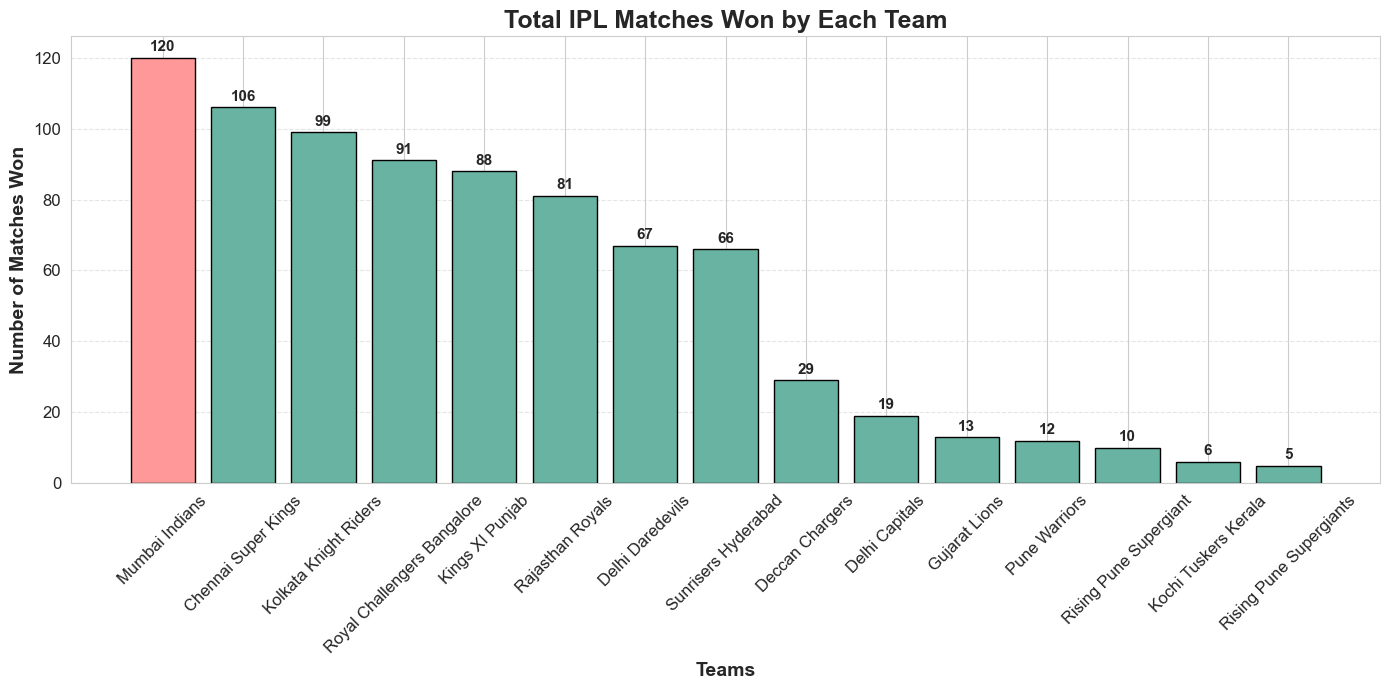

In [27]:
# Identify the team with the most wins
top_team = match_winner.idxmax()

# Prepare colors: highlight top team
colors = ['#ff9999' if team == top_team else '#69b3a2' for team in match_winner.index]

plt.figure(figsize=(14,7))

# Bars
bars = plt.bar(match_winner.index, match_winner.values, color=colors, edgecolor='black')

# Annotate each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(int(height)),
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Labels and title
plt.xlabel('Teams', fontsize=14, fontweight='bold')
plt.ylabel('Number of Matches Won', fontsize=14, fontweight='bold')
plt.title('Total IPL Matches Won by Each Team', fontsize=18, fontweight='bold')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# 13.	Which team has the highest winning percentage? 

In [28]:
match_win  = pd.DataFrame(match_winner)
match_win['total matches'] = concat_matches
match_win.columns = ['Wins','Total Matches']
match_win['Win%'] = (match_win['Wins']/match_win['Total Matches'] * 100 ).round(1)
match_win

,Wins,Total Matches,Win%
winner,,,
Mumbai Indians,120,203,59.1
Chennai Super Kings,106,178,59.6
Kolkata Knight Riders,99,192,51.6
Royal Challengers Bangalore,91,195,46.7
Kings XI Punjab,88,190,46.3
Rajasthan Royals,81,161,50.3
Delhi Daredevils,67,161,41.6
Sunrisers Hyderabad,66,124,53.2
Deccan Chargers,29,75,38.7


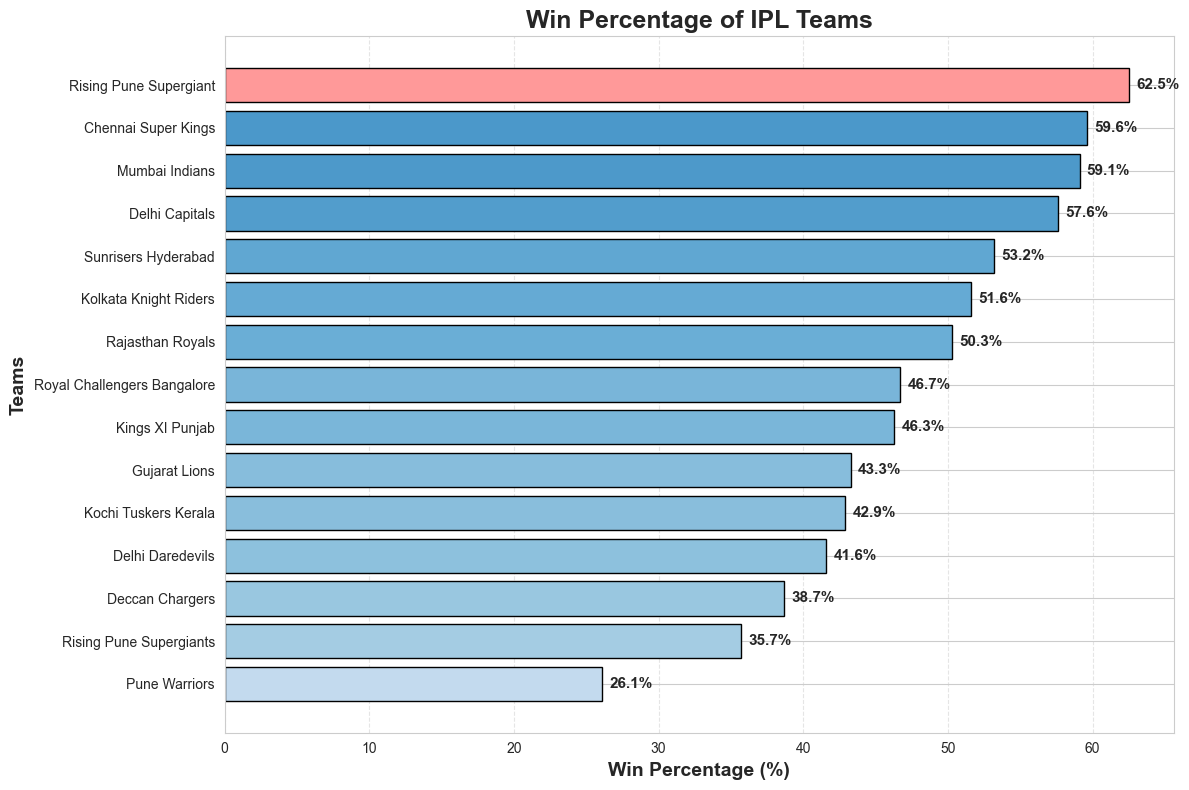

In [29]:
# Sort by Win%
match_win_sorted = match_win.sort_values('Win%', ascending=True)  # ascending for horizontal plot

# Identify top team
top_team = match_win_sorted['Win%'].idxmax()

# Colors: gradient based on Win%, highlight top team
colors = ['#ff9999' if team == top_team else plt.cm.Blues(val/100) for team, val in zip(match_win_sorted.index, match_win_sorted['Win%'])]

plt.figure(figsize=(12,8))

# Horizontal bar plot
bars = plt.barh(match_win_sorted.index, match_win_sorted['Win%'], color=colors, edgecolor='black')

# Annotate bars with Win%
for bar, val in zip(bars, match_win_sorted['Win%']):
    plt.text(val + 0.5, bar.get_y() + bar.get_height()/2, f"{val}%", 
             va='center', fontsize=11, fontweight='bold')

# Labels and title
plt.xlabel('Win Percentage (%)', fontsize=14, fontweight='bold')
plt.ylabel('Teams', fontsize=14, fontweight='bold')
plt.title('Win Percentage of IPL Teams', fontsize=18, fontweight='bold')

# Gridlines
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# 14.	Is there any lucky venue for a particular team?

In [30]:
venue_wins = df_matches.groupby(['venue'])['winner'].value_counts().nlargest(8).reset_index()
venue_wins.columns = ['venue','Teams','Win']
concat_matches_df = concat_matches.reset_index()
concat_matches_df.columns = ['Teams', 'Matches']
result = venue_wins.merge(concat_matches_df, on='Teams')
result['Percentage'] = (result['Win'] / result['Matches'] * 100).round(1)
result


,venue,Teams,Win,Matches,Percentage
0,Eden Gardens,Kolkata Knight Riders,45,192,23.4
1,Wankhede Stadium,Mumbai Indians,42,203,20.7
2,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,40,178,22.5
3,Sawai Mansingh Stadium,Rajasthan Royals,32,161,19.9
4,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,30,124,24.2
5,M Chinnaswamy Stadium,Royal Challengers Bangalore,29,195,14.9
6,Feroz Shah Kotla,Delhi Daredevils,27,161,16.8
7,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,18,190,9.5


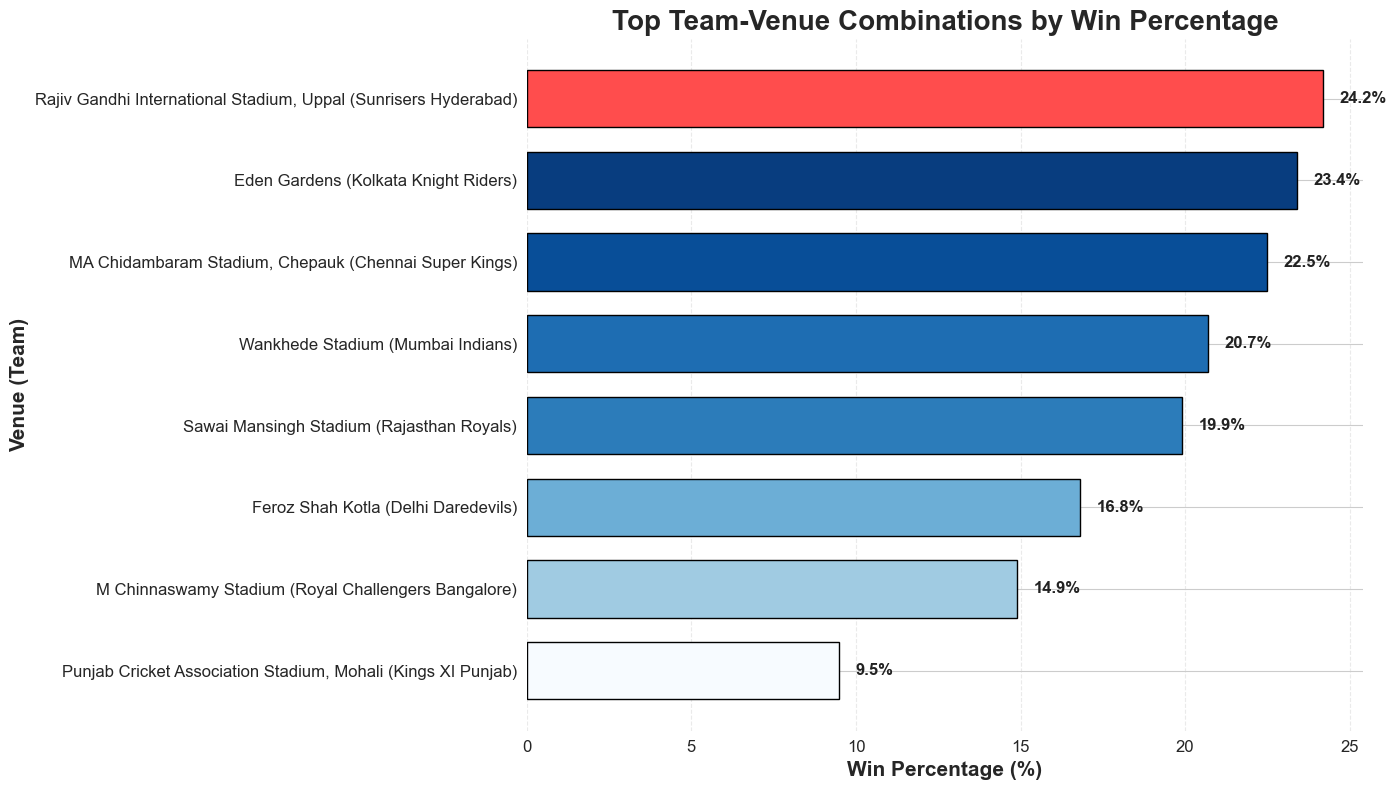

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sort by Percentage ascending for horizontal bar plot
result_sorted = result.sort_values('Percentage', ascending=True).reset_index(drop=True)

# Highlight the top team-venue combination
top_idx = result_sorted['Percentage'].idxmax()

# Create a gradient color palette
norm = plt.Normalize(result_sorted['Percentage'].min(), result_sorted['Percentage'].max())
colors = plt.cm.Blues(norm(result_sorted['Percentage']))
colors[top_idx] = np.array([1.0, 0.3, 0.3, 1.0])  # Red for top combo

plt.figure(figsize=(14,8))

# Horizontal bars with rounded edges
bars = plt.barh(result_sorted['venue'] + " (" + result_sorted['Teams'] + ")",
                result_sorted['Percentage'], color=colors, edgecolor='black', height=0.7)

# Annotate each bar with percentage
for bar, val in zip(bars, result_sorted['Percentage']):
    plt.text(val + 0.5, bar.get_y() + bar.get_height()/2, f"{val}%", 
             va='center', fontsize=12, fontweight='bold', color='#222222')

# Labels and title
plt.xlabel('Win Percentage (%)', fontsize=15, fontweight='bold')
plt.ylabel('Venue (Team)', fontsize=15, fontweight='bold')
plt.title('Top Team-Venue Combinations by Win Percentage', fontsize=20, fontweight='bold')

# Gridlines and minimalist style
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


# 15.	Innings wise comparison between teams

In [32]:
df_matches = df_matches.merge(df_ball[['inning','id' ]], on='id')
innings_wins = df_matches.groupby(['winner', 'result'])['id'].nunique().unstack(fill_value=0)

In [33]:
innings_wins = df_matches.groupby(['winner', 'result'])['id'].nunique().unstack(fill_value=0)
innings_wins

result,runs,tie,wickets
winner,,,
Chennai Super Kings,53,0,53
Deccan Chargers,18,0,11
Delhi Capitals,9,2,8
Delhi Daredevils,25,0,42
Gujarat Lions,1,0,12
Kings XI Punjab,40,3,45
Kochi Tuskers Kerala,2,0,4
Kolkata Knight Riders,41,1,57
Mumbai Indians,62,2,56


In [34]:
del df_matches['inning']

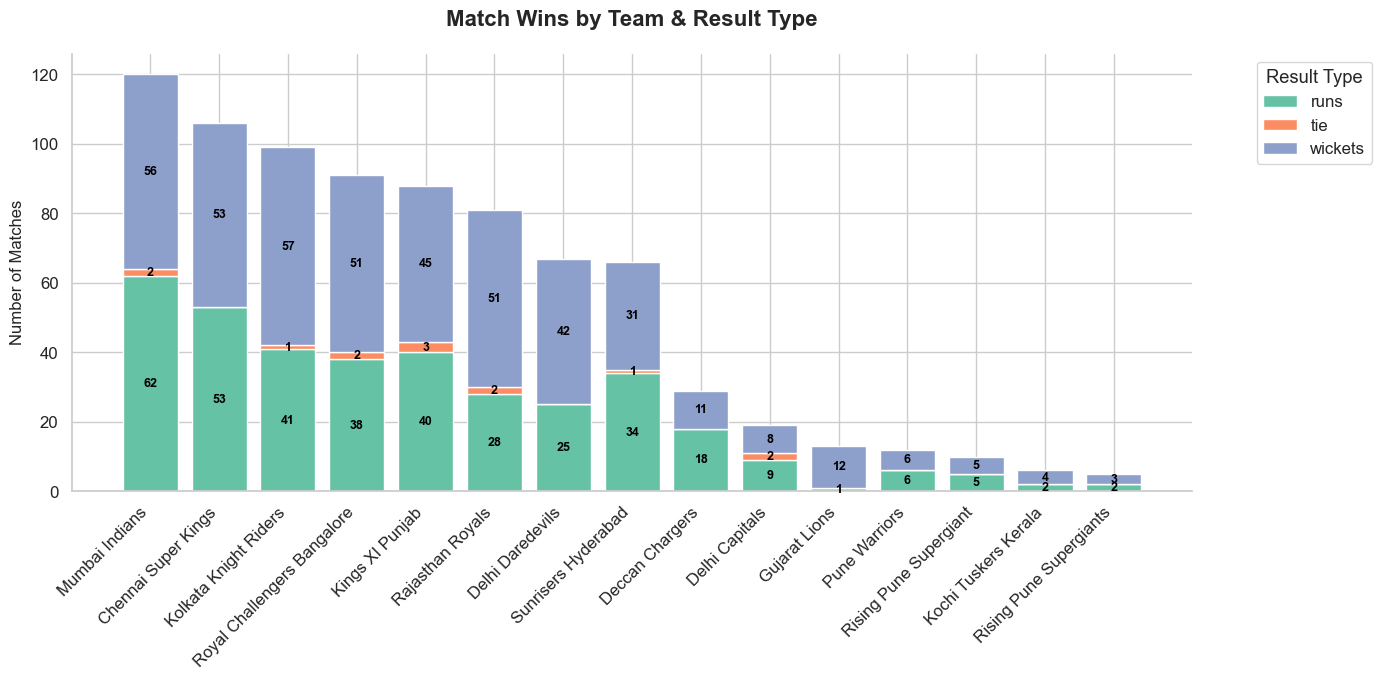

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Sort teams by total wins ---
innings_wins['Total'] = innings_wins.sum(axis=1)
innings_wins = innings_wins.sort_values('Total', ascending=False)
innings_wins.drop(columns='Total', inplace=True)

# --- Set style ---
sns.set_theme(style="whitegrid", font_scale=1.1)
colors = sns.color_palette("Set2", n_colors=len(innings_wins.columns))

# --- Plot ---
fig, ax = plt.subplots(figsize=(14, 7))

bottom = [0] * len(innings_wins)
for col, color in zip(innings_wins.columns, colors):
    ax.bar(
        innings_wins.index,
        innings_wins[col],
        bottom=bottom,
        label=col,
        color=color
    )
    # Add text labels
    for j, val in enumerate(innings_wins[col]):
        if val > 0:
            ax.text(
                j,
                bottom[j] + val / 2,
                str(val),
                ha='center',
                va='center',
                fontsize=9,
                color="black",
                fontweight="bold"
            )
    bottom = [bottom[k] + innings_wins[col].iloc[k] for k in range(len(bottom))]

# --- Titles & Labels ---
ax.set_title("Match Wins by Team & Result Type", fontsize=16, fontweight="bold", pad=20)
ax.set_xlabel("")
ax.set_ylabel("Number of Matches", fontsize=12)

# ✅ Fix for set_xticklabels warning
ax.set_xticks(range(len(innings_wins.index)))  # set tick positions
ax.set_xticklabels(innings_wins.index, rotation=45, ha="right")

ax.legend(title="Result Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# --- Clean look ---
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()


# 16.	Which team has scored the most number of 200+ scores?

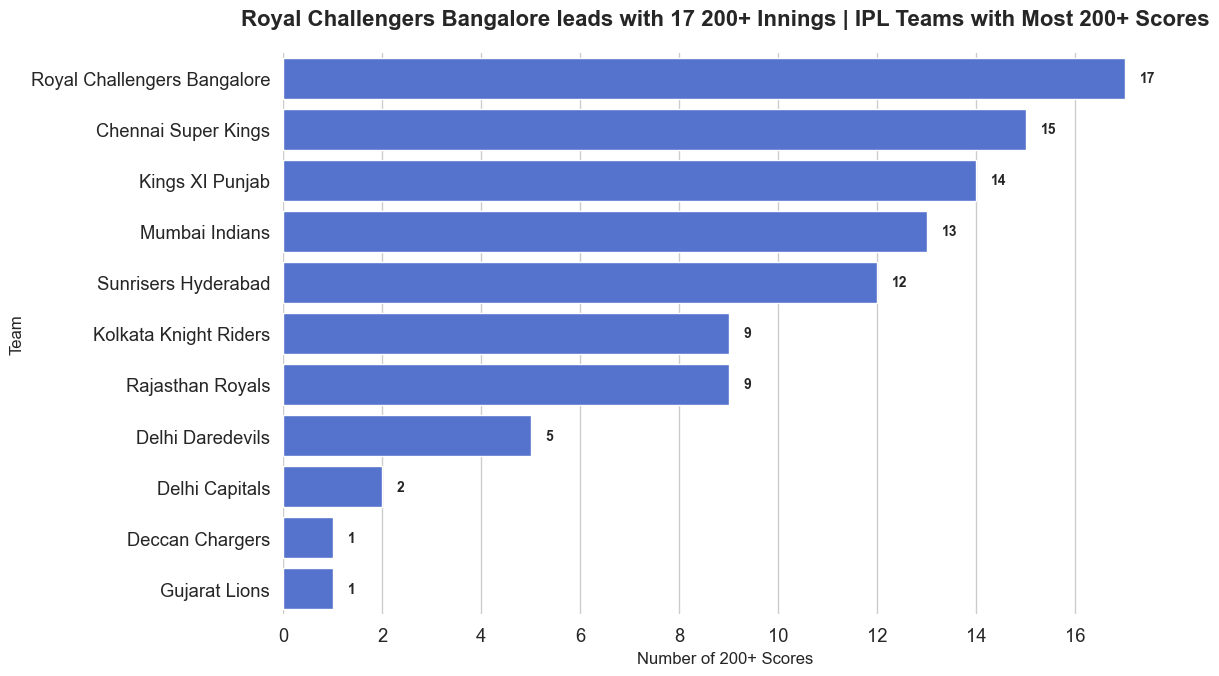

In [36]:
team_runs = df_ball.groupby(['batting_team', 'id', 'inning'])['total_runs'].sum().reset_index()
most_200 = team_runs[team_runs['total_runs'] > 200]

most_200_counts = most_200['batting_team'].value_counts().reset_index()
most_200_counts.columns = ['Team', '200+ Scores']

most_200_counts = most_200_counts.sort_values('200+ Scores', ascending=False)

top_team = most_200_counts.iloc[0]['Team']
top_count = most_200_counts.iloc[0]['200+ Scores']

sns.set_theme(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(12, 7))
bars = sns.barplot(
    x='200+ Scores',
    y='Team',
    data=most_200_counts,
    color='royalblue'
)

for bar in bars.patches:
    width = bar.get_width()
    plt.text(
        width + 0.3,
        bar.get_y() + bar.get_height() / 2,
        f'{int(width)}',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

plt.title(
    f"{top_team} leads with {int(top_count)} 200+ Innings | IPL Teams with Most 200+ Scores",
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel("Number of 200+ Scores", fontsize=12)
plt.ylabel("Team", fontsize=12)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


# 17.	Which team has conceded 200+ scores the most?

In [37]:
team_runs = df_ball.groupby(['bowling_team','id','inning'])['total_runs'].sum().reset_index()
most_200_conced = team_runs[team_runs['total_runs'] > 200 ]
most_200_conced_counts = most_200_conced['bowling_team'].value_counts()

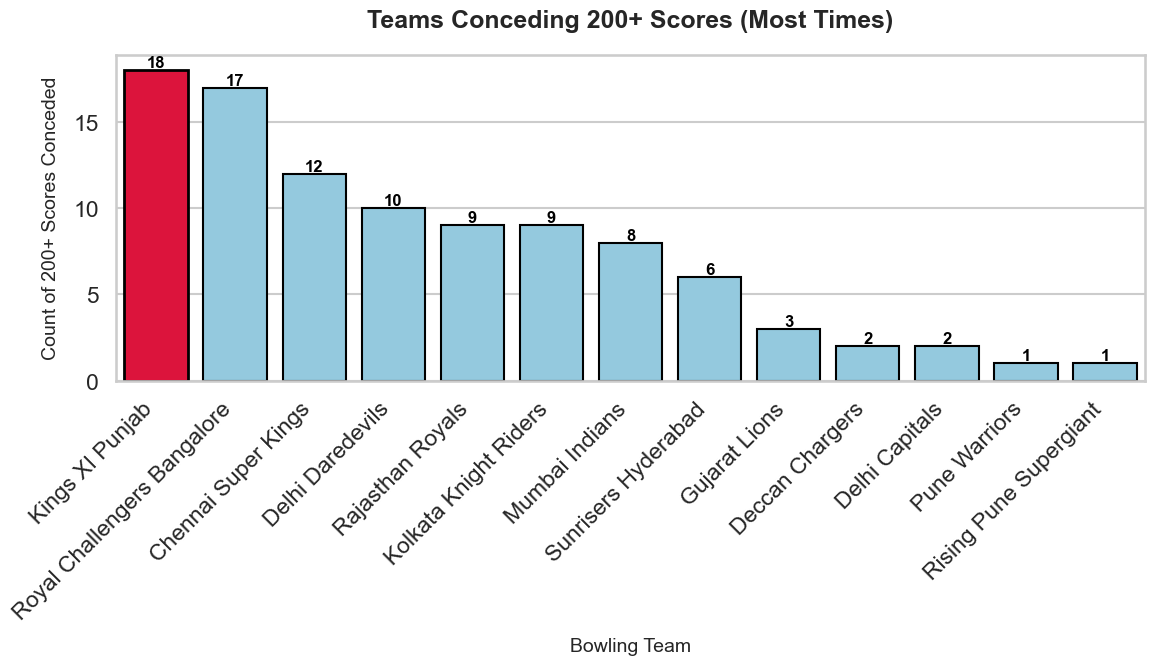

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Preparation ---
most_200_conced_counts = most_200_conced['bowling_team'].value_counts()

# --- Sort values for storytelling (highest on left) ---
most_200_conced_counts = most_200_conced_counts.sort_values(ascending=False)

# --- Styling ---
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")
sns.set_context("talk")

# --- Plot (no palette warning) ---
ax = sns.barplot(
    x=most_200_conced_counts.index,
    y=most_200_conced_counts.values,
    color="skyblue",  # base color
    edgecolor="black"
)

# --- Titles & Labels (no emoji to avoid font error) ---
plt.title("Teams Conceding 200+ Scores (Most Times)", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Bowling Team", fontsize=14, labelpad=10)
plt.ylabel("Count of 200+ Scores Conceded", fontsize=14, labelpad=10)

# --- Rotate x-axis labels ---
plt.xticks(rotation=45, ha="right")

# --- Annotate bars ---
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="bottom", fontsize=12, fontweight="bold", color="black"
    )

# --- Highlight top conceding team ---
max_idx = most_200_conced_counts.values.argmax()
ax.patches[max_idx].set_facecolor("crimson")
ax.patches[max_idx].set_linewidth(2)

# --- Layout ---
plt.tight_layout()
plt.show()


# 18.	What was the highest run scored by a team in a single match?  


In [39]:
runs_per_match = df_ball.groupby([ 'batting_team','id', 'inning'])['total_runs'].sum().reset_index()
highst_runs = runs_per_match['total_runs'].idxmax()
runs_per_match.loc[highst_runs,[ 'batting_team', 'total_runs']]

batting_team    Royal Challengers Bangalore
total_runs                              263
Name: 1394, dtype: object

# 19.	Which is the biggest win in terms of run margin?

In [40]:
margin = df_matches['result_margin'].idxmax()
df_matches.loc[margin,['result_margin','winner']]

result_margin             146.0
winner           Mumbai Indians
Name: 146713, dtype: object

# 20.	Which batsmen have played the most number of balls? 

In [41]:
most_ball_played_bat = df_ball['batsman'].value_counts().reset_index()
most_ball_played_bat.columns = ['Batsman','Balls']
most_ball_played_bat.head(1)

,Batsman,Balls
0,V Kohli,4609


# 21.	Who are the leading run-scorers of all time?

In [42]:
bat_runs = df_ball.groupby('batsman')['batsman_runs'].sum().reset_index()
bat_runs.columns = ['Batsman','Runs']
bat_runs.sort_values(by='Runs', ascending=False).head(1)

,Batsman,Runs
505,V Kohli,5878


# 22.	Who has hit the most number of 4's?

In [43]:
most_four = df_ball[df_ball['batsman_runs'] == 4 ].groupby('batsman')['batsman_runs'].count().nlargest(3).reset_index()
most_four.columns = ['Batsman','Fours']
most_four

,Batsman,Fours
0,S Dhawan,591
1,DA Warner,510
2,V Kohli,504


# 23.	Who has hit the most number of 6's? 


In [44]:
most_six = df_ball[df_ball['batsman_runs'] == 6 ].groupby('batsman')['batsman_runs'].count().nlargest(3).reset_index()
most_six.columns = ['Batsman','Six']
most_six

,Batsman,Six
0,CH Gayle,349
1,AB de Villiers,235
2,MS Dhoni,216


# 24.	Who has the highest strike rate? 


In [45]:
players_stat = bat_runs.merge(most_ball_played_bat , on='Batsman')
players_stat['Strike Rate'] = (players_stat['Runs'] / players_stat['Balls'] * 100).round(1)
filt =  players_stat[players_stat['Balls']> 10000]   
filt.nlargest(5 , 'Strike Rate') 

,Batsman,Runs,Balls,Strike Rate


# 25.	Who is the leading wicket-taker?

In [46]:
filtor = df_ball[df_ball['dismissal_kind'].isin(['caught', 'bowled', 'lbw',
       'stumped', 'caught and bowled', 'hit wicket'])]
leading_wicketer = filtor.groupby('bowler')['is_wicket'].sum().nlargest().reset_index()
leading_wicketer

,bowler,is_wicket
0,SL Malinga,170
1,A Mishra,160
2,PP Chawla,156
3,DJ Bravo,153
4,Harbhajan Singh,150


# 26.	Which stadium has hosted the most number of matches?

In [47]:
df_matches.groupby('venue')['venue'].count().nlargest()

venue
Eden Gardens                                 17988
Wankhede Stadium                             17584
Feroz Shah Kotla                             17294
Rajiv Gandhi International Stadium, Uppal    15200
M Chinnaswamy Stadium                        14895
Name: venue, dtype: int64

# 27.	Who has won the most MOM awards? 

In [48]:
df_matches_unique = df_matches[['id', 'player_of_match']].drop_duplicates()

mom_counts = (
    df_matches_unique['player_of_match']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Player', 'player_of_match': 'MOM_Count'})
)

top_10_mom = mom_counts.head(10)
top_10_mom


,MOM_Count,count
0,AB de Villiers,23
1,CH Gayle,22
2,RG Sharma,18
3,DA Warner,17
4,MS Dhoni,17
5,SR Watson,16
6,YK Pathan,16
7,SK Raina,14
8,V Kohli,13
9,G Gambhir,13


# 28.	What is the count of fours hit in each season? 

In [49]:
id_to_season = df_matches.set_index('id')['season'].to_dict()
df_ball['season'] = df_ball['id'].map(id_to_season)

fours = df_ball[
    (df_ball['batsman_runs'] == 4) &
    (df_ball['extra_runs'] == 0)  
]

season_fours = (
    fours.groupby('season')['batsman_runs']
    .count()
    .reset_index()
    .rename(columns={'batsman_runs': 'Fours'})
)

season_fours = season_fours.sort_values('season').reset_index(drop=True)
season_fours


,season,Fours
0,2008,1692
1,2009,1307
2,2010,1701
3,2011,1909
4,2012,1901
5,2013,2047
6,2014,1556
7,2015,1603
8,2016,1624
9,2017,1604


# 29.	What is the count of sixes hit in each season? 

In [50]:
id_to_season = df_matches.set_index('id')['season'].to_dict()

df_ball['season'] = df_ball['id'].map(id_to_season)

sixes = df_ball[df_ball['batsman_runs'] == 6]

season_sixes = (
    sixes.groupby('season')['batsman_runs']
    .count()
    .reset_index()
    .rename(columns={'batsman_runs': 'Sixes'})
)

season_sixes = season_sixes.sort_values('season').reset_index(drop=True)
season_sixes


,season,Sixes
0,2008,623
1,2009,506
2,2010,585
3,2011,639
4,2012,733
5,2013,675
6,2014,714
7,2015,692
8,2016,639
9,2017,705


# 30.	What is the count of runs scored from boundaries in each season? 

In [51]:
id_to_season = df_matches.set_index('id')['season'].to_dict()
df_ball['season'] = df_ball['id'].map(id_to_season)

boundary_balls = df_ball[df_ball['batsman_runs'].isin([4, 6])]

season_boundary_runs = (
    boundary_balls.groupby('season')['batsman_runs']
    .sum()
    .reset_index()
    .rename(columns={'batsman_runs': 'Boundary_Runs'})
)

season_boundary_runs = season_boundary_runs.sort_values('season').reset_index(drop=True)
season_boundary_runs


,season,Boundary_Runs
0,2008,10550
1,2009,8304
2,2010,10342
3,2011,11498
4,2012,12042
5,2013,12258
6,2014,10532
7,2015,10580
8,2016,10366
9,2017,10674


# 31. What is the run contribution from boundaries in each season?  

In [52]:
# --- Total runs per season (memory-efficient) ---
total_runs_season = df_ball.groupby('season')['total_runs'].sum().reset_index()

# --- Merge boundary runs per season ---
total_runs = total_runs_season.merge(
    season_boundary_runs.rename(columns={'Boundary_Runs': 'boundary_runs'}),
    on='season',
    how='left'
)

# Fill NaN boundary runs with 0 (in case a season has no boundaries)
total_runs['boundary_runs'] = total_runs['boundary_runs'].fillna(0)

# --- Calculate boundary contribution percentage ---
total_runs['boundary_contribution_pct'] = (
    (total_runs['boundary_runs'] / total_runs['total_runs']) * 100
).round(1)

# --- Reorder columns professionally ---
total_runs = total_runs[['season', 'total_runs', 'boundary_runs', 'boundary_contribution_pct']]
total_runs


,season,total_runs,boundary_runs,boundary_contribution_pct
0,2008,17937,10550,58.8
1,2009,16320,8304,50.9
2,2010,18864,10342,54.8
3,2011,21154,11498,54.4
4,2012,22453,12042,53.6
5,2013,22541,12258,54.4
6,2014,18909,10532,55.7
7,2015,18332,10580,57.7
8,2016,18862,10366,55.0
9,2017,18769,10674,56.9


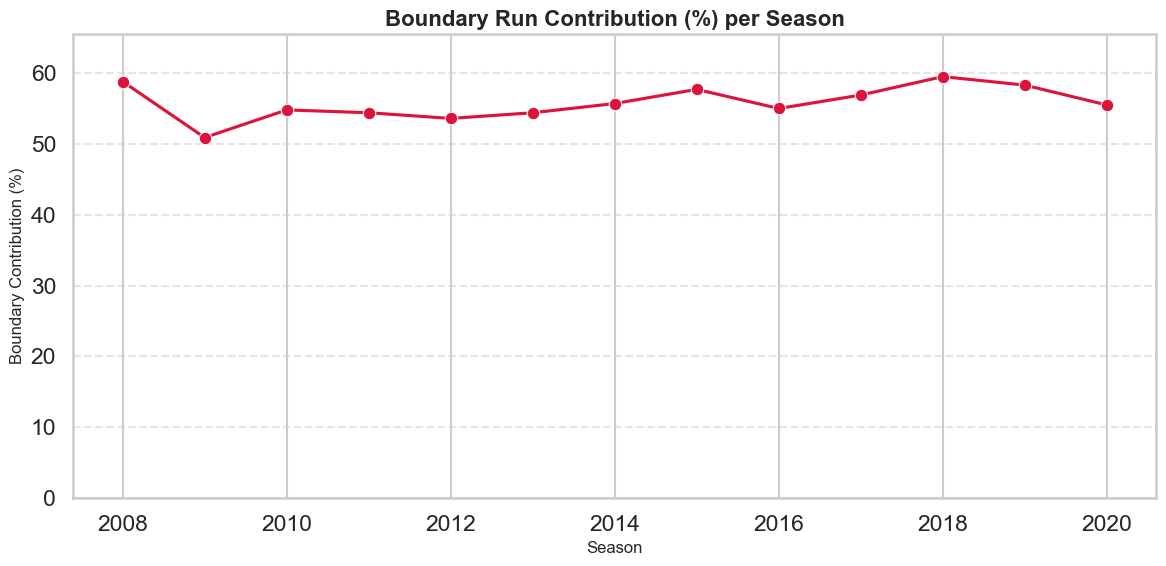

In [53]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=total_runs,
    x='season',
    y='boundary_contribution_pct',
    marker='o',
    color='crimson'
)
plt.title('Boundary Run Contribution (%) per Season', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Boundary Contribution (%)', fontsize=12)
plt.ylim(0, max(total_runs['boundary_contribution_pct'])*1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 32.	Which team has scored the most runs in the first 6 overs? 

In [54]:
powerplay = df_ball[df_ball['over'].between(0, 5)]

powerplay_runs = (
    powerplay.groupby('batting_team')['total_runs']
    .sum()
    .reset_index()
    .rename(columns={'batting_team': 'Team', 'total_runs': 'Powerplay_Runs'})
)

powerplay_runs = powerplay_runs.sort_values(by='Powerplay_Runs', ascending=False).reset_index(drop=True)
powerplay_runs


,Team,Powerplay_Runs
0,Mumbai Indians,9204
1,Kings XI Punjab,8907
2,Kolkata Knight Riders,8871
3,Royal Challengers Bangalore,8699
4,Chennai Super Kings,8048
5,Delhi Daredevils,7349
6,Rajasthan Royals,7151
7,Sunrisers Hyderabad,5917
8,Deccan Chargers,3417
9,Pune Warriors,1895


C:\Users\adity\AppData\Local\Temp\ipykernel_9768\3638533347.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


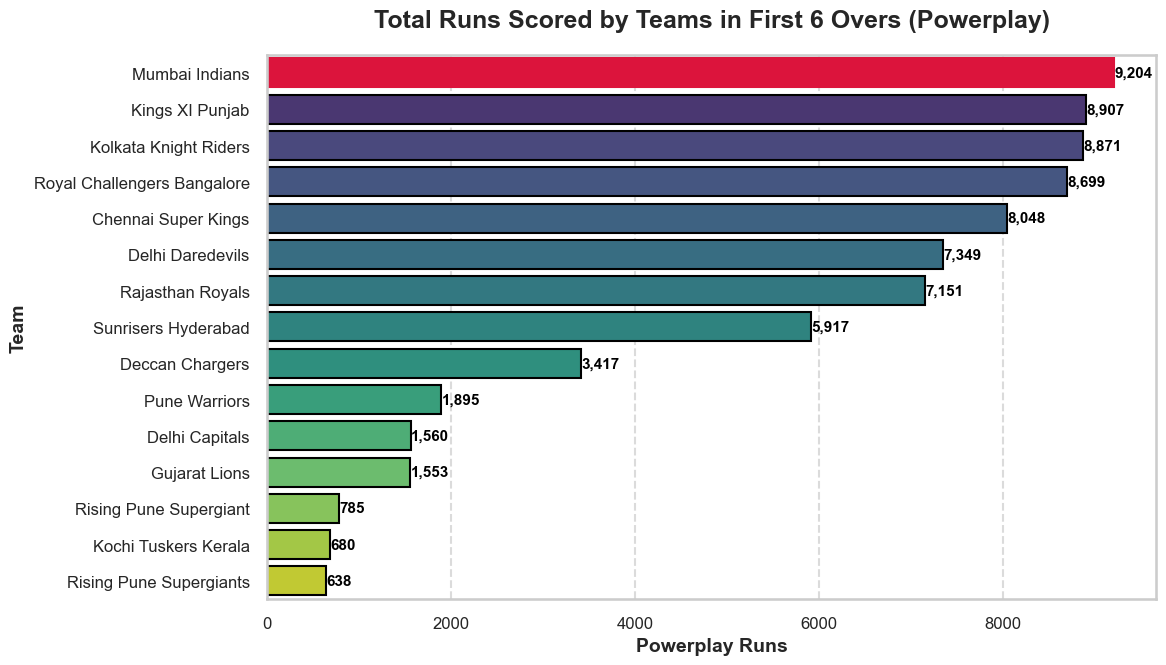

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set professional Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))

# Horizontal bar plot
barplot = sns.barplot(
    data=powerplay_runs,
    y='Team',          # Teams on y-axis for better readability
    x='Powerplay_Runs',
    palette='viridis',  # visually appealing gradient
    edgecolor='black'
)

# Highlight the top team
top_team_idx = powerplay_runs['Powerplay_Runs'].idxmax()
barplot.patches[top_team_idx].set_color('crimson')

# Annotate exact runs on bars
for i, row in powerplay_runs.iterrows():
    barplot.text(
        row['Powerplay_Runs'] + 5, i,  # small offset for readability
        f"{int(row['Powerplay_Runs']):,}",  # formatted with commas
        va='center', fontsize=11, fontweight='bold', color='black'
    )

# Titles and labels
plt.title('Total Runs Scored by Teams in First 6 Overs (Powerplay)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Powerplay Runs', fontsize=14, fontweight='bold')
plt.ylabel('Team', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Grid for x-axis
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


# 33.	Which team has scored the most runs in the last 4 overs? 

In [56]:
death_overs = df_ball[(df_ball['over'] >= 16 ) & (df_ball['over'] <= 19 )]
death_overs_runs = death_overs.groupby('batting_team')['total_runs'].sum().reset_index()
death_overs_runs.columns = ['Team','Deathover_runs']
death_overs_runs

,Team,Deathover_runs
0,Chennai Super Kings,6655
1,Deccan Chargers,2539
2,Delhi Capitals,1160
3,Delhi Daredevils,5043
4,Gujarat Lions,921
5,Kings XI Punjab,6227
6,Kochi Tuskers Kerala,337
7,Kolkata Knight Riders,6224
8,Mumbai Indians,7538
9,Pune Warriors,1360


In [57]:
death_overs_runs = death_overs.groupby('batting_team')['total_runs'].sum().reset_index()
death_overs_runs.columns = ['Team','Deathover_runs']
death_overs_runs

,Team,Deathover_runs
0,Chennai Super Kings,6655
1,Deccan Chargers,2539
2,Delhi Capitals,1160
3,Delhi Daredevils,5043
4,Gujarat Lions,921
5,Kings XI Punjab,6227
6,Kochi Tuskers Kerala,337
7,Kolkata Knight Riders,6224
8,Mumbai Indians,7538
9,Pune Warriors,1360


# 34.	Which team has the best scoring run-rate in the first 6 overs?

In [58]:

powerplay_stats = powerplay.groupby('batting_team').agg(
    total_runs=('total_runs', 'sum'),
    balls_faced=('ball', 'count')
).reset_index()

powerplay_stats['Overs_Faced'] = powerplay_stats['balls_faced'] / 6
powerplay_stats['Run_Rate'] = (powerplay_stats['total_runs'] / powerplay_stats['Overs_Faced']).round(2)
powerplay_stats = powerplay_stats.sort_values('Run_Rate', ascending=False).reset_index(drop=True)
powerplay_stats

,batting_team,total_runs,balls_faced,Overs_Faced,Run_Rate
0,Gujarat Lions,1553,1117,186.166667,8.34
1,Rising Pune Supergiant,785,598,99.666667,7.88
2,Sunrisers Hyderabad,5917,4633,772.166667,7.66
3,Kochi Tuskers Kerala,680,533,88.833333,7.65
4,Delhi Capitals,1560,1226,204.333333,7.63
5,Kings XI Punjab,8907,7109,1184.833333,7.52
6,Kolkata Knight Riders,8871,7195,1199.166667,7.40
7,Rising Pune Supergiants,638,522,87.000000,7.33
8,Delhi Daredevils,7349,6021,1003.500000,7.32
9,Chennai Super Kings,8048,6637,1106.166667,7.28


C:\Users\adity\AppData\Local\Temp\ipykernel_9768\512012677.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


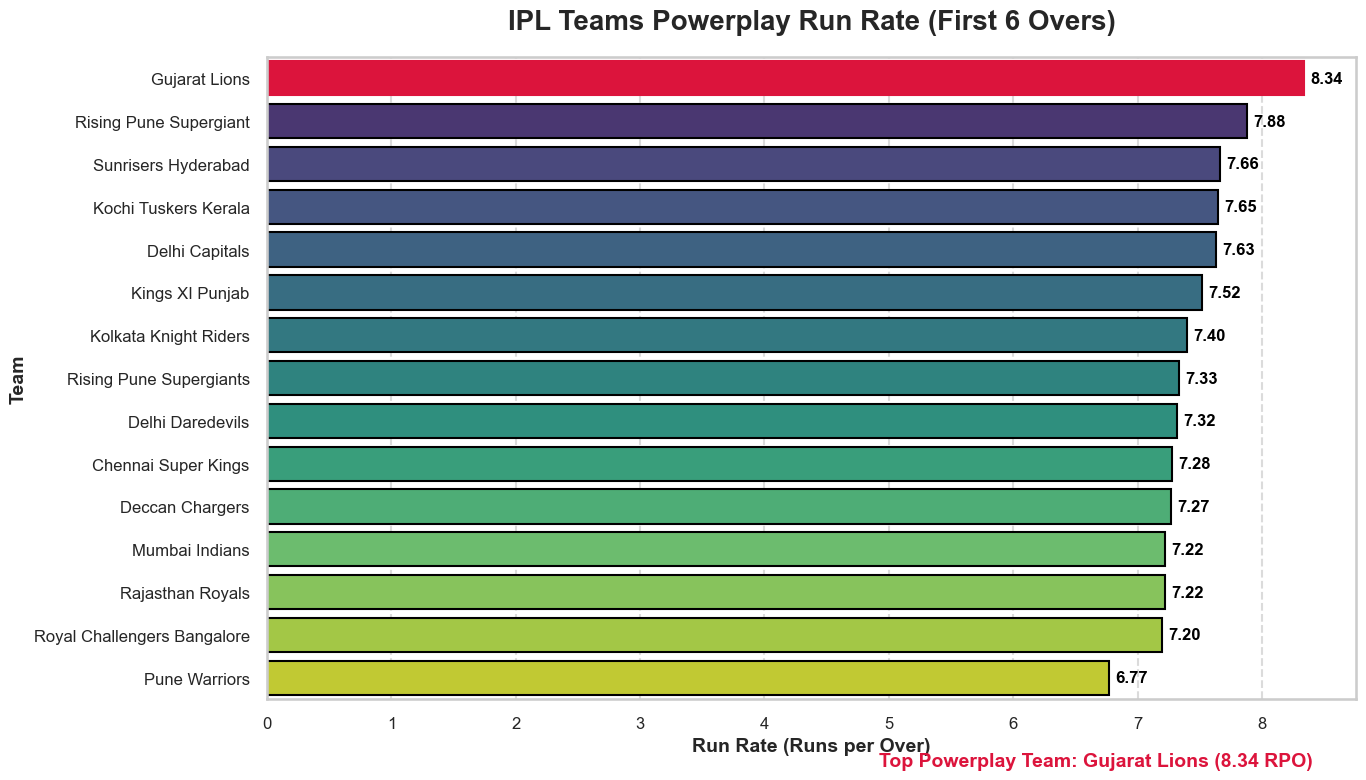

In [59]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,8))

powerplay_stats = powerplay_stats.sort_values('Run_Rate', ascending=False)

barplot = sns.barplot(
    data=powerplay_stats,
    y='batting_team',
    x='Run_Rate',
    palette=sns.color_palette("viridis", len(powerplay_stats)),
    edgecolor='black'
)

top_idx = 0  
barplot.patches[top_idx].set_color('crimson')

for i, row in powerplay_stats.iterrows():
    barplot.text(
        row['Run_Rate'] + 0.05, i,   
        f"{row['Run_Rate']:.2f}",
        va='center',
        fontsize=12,
        fontweight='bold',
        color='black'
    )

plt.title('IPL Teams Powerplay Run Rate (First 6 Overs)', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Run Rate (Runs per Over)', fontsize=14, fontweight='bold')
plt.ylabel('Team', fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

top_team = powerplay_stats.iloc[0]['batting_team']
top_run_rate = powerplay_stats.iloc[0]['Run_Rate']
plt.text(
    0.95, 0.02,
    f"Top Powerplay Team: {top_team} ({top_run_rate:.2f} RPO)",
    transform=plt.gcf().transFigure,
    fontsize=14,
    fontweight='bold',
    color='crimson',
    ha='right'
)

plt.show()


# 35. Which team has the best scoring run-rate in the last 4 overs?

In [60]:
dd = death_overs.groupby('batting_team')['over'].count().div(6).reset_index().round(0)
dd.columns = ['Team','overs_faced']
dd_states = death_overs_runs.merge(dd,on='Team')
dd_states['Run_rate'] = (dd_states['Deathover_runs']/dd_states['overs_faced']).round(2)

In [61]:
dd_states

,Team,Deathover_runs,overs_faced,Run_rate
0,Chennai Super Kings,6655,658.0,10.11
1,Deccan Chargers,2539,276.0,9.20
2,Delhi Capitals,1160,124.0,9.35
3,Delhi Daredevils,5043,525.0,9.61
4,Gujarat Lions,921,102.0,9.03
5,Kings XI Punjab,6227,676.0,9.21
6,Kochi Tuskers Kerala,337,40.0,8.43
7,Kolkata Knight Riders,6224,647.0,9.62
8,Mumbai Indians,7538,744.0,10.13
9,Pune Warriors,1360,168.0,8.10


C:\Users\adity\AppData\Local\Temp\ipykernel_9768\1626427940.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


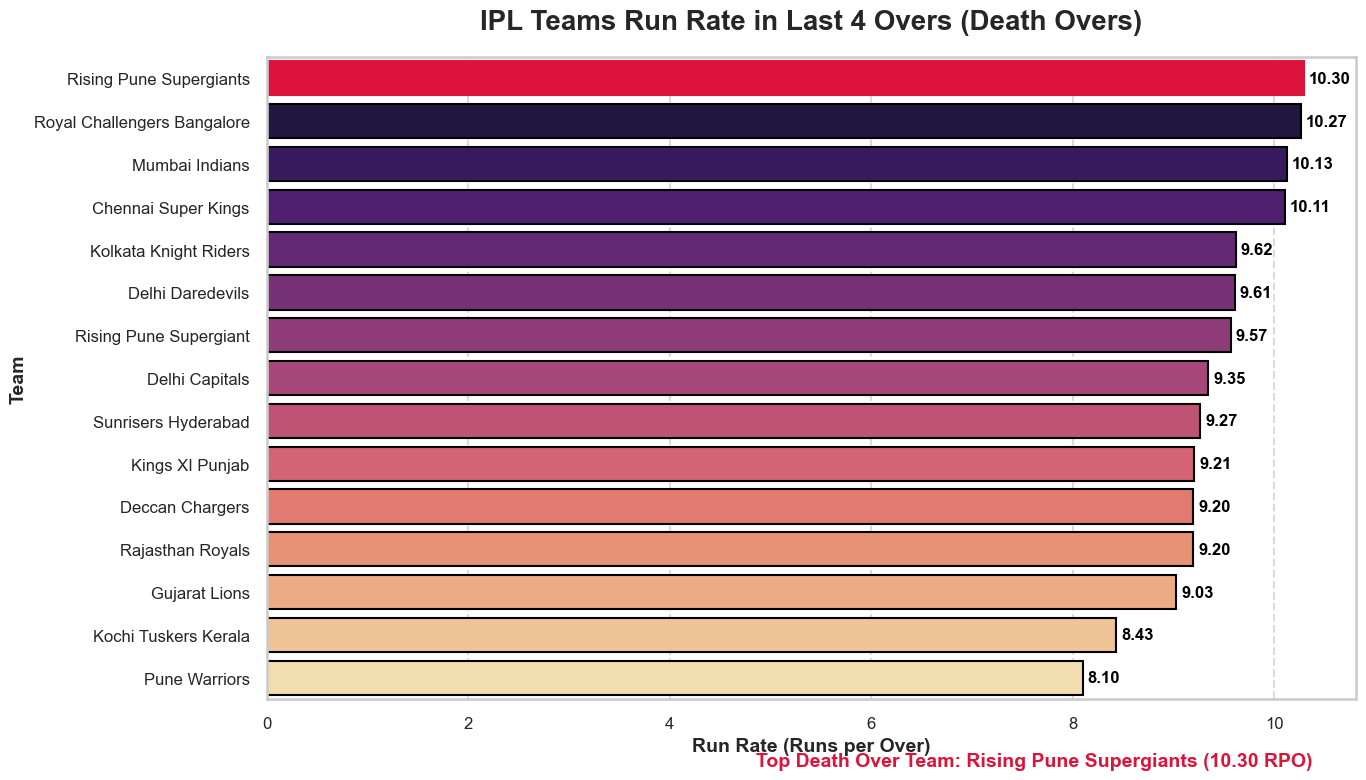

In [62]:
dd_states = dd_states.sort_values('Run_rate', ascending=False).reset_index(drop=True)

sns.set_style("whitegrid")
plt.figure(figsize=(14,8))

barplot = sns.barplot(
    data=dd_states,
    y='Team',
    x='Run_rate',
    palette=sns.color_palette("magma", len(dd_states)),
    edgecolor='black'
)

barplot.patches[0].set_color('crimson')

for i, row in dd_states.iterrows():
    barplot.text(
        row['Run_rate'] + 0.05, i,
        f"{row['Run_rate']:.2f}",
        va='center',
        fontsize=12,
        fontweight='bold',
        color='black'
    )

plt.title('IPL Teams Run Rate in Last 4 Overs (Death Overs)', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Run Rate (Runs per Over)', fontsize=14, fontweight='bold')
plt.ylabel('Team', fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

top_team = dd_states.iloc[0]['Team']
top_run_rate = dd_states.iloc[0]['Run_rate']
plt.text(
    0.95, 0.02,
    f"Top Death Over Team: {top_team} ({top_run_rate:.2f} RPO)",
    transform=plt.gcf().transFigure,
    fontsize=14,
    fontweight='bold',
    color='crimson',
    ha='right'
)

plt.show()
